# Build a DeBruijn Graph

Write a function "de_bruijn_ize" which gets a string and a kmer length k and returns the nodes and edges of the corresponding DeBruijn graph.

Remember how to build the DeBruijn Graph:

  1. For each kmer, build the left and right (k-1)mer. These are the two starting nodes of the graph.
  2. Insert an edge between these two nodes.
  3. Repeat for all remaining kmers.

In [12]:
def chop(st, k):
  """ Chop a string up into k mers of given length """
  for i in range(0, len(st)-(k-1)):
    yield st[i:i+k]

In [45]:
def dict_to_list(input_dict):
    output_list = []
    for key, values in input_dict.items():
        if isinstance(values, list):  # Check if values is a list
            output_list.append(tuple([key] + values))  # Use tuple for immutability
        else:  # Handle single values (if any)
            output_list.append((key, values))
    return output_list

In [59]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    # your code
    nodes = {}
    edges = []
    for kmer in chop(st, k):
      km1L, km1R = kmer[:-1], kmer[1:]
      nodeL, nodeR = None, None
      if km1L in nodes:
        nodeL = nodes[km1L]
      else:
        nodeL = nodes[km1L] = km1L
      if km1R in nodes:
        nodeR = nodes[km1R]
      else:
        nodeR = nodes[km1R] = km1R
      edges.append((nodeL, nodeR))
    return list(nodes), edges

In [60]:
nodes, edges = de_bruijn_ize("ACGCGTCG", 3)

In [55]:
nodes

['AC', 'CG', 'GC', 'GT', 'TC']

In [61]:
edges

[('AC', 'CG'),
 ('CG', 'GC'),
 ('GC', 'CG'),
 ('CG', 'GT'),
 ('GT', 'TC'),
 ('TC', 'CG')]

In [62]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

In [33]:
# might have to install gvmagic this first:
!pip install graphviz
!pip install git+https://github.com/cjdrake/gvmagic

  Cloning https://github.com/cjdrake/gvmagic to /tmp/pip-req-build-budg_cyl
  Running command git clone --filter=blob:none --quiet https://github.com/cjdrake/gvmagic /tmp/pip-req-build-budg_cyl
  Resolved https://github.com/cjdrake/gvmagic to commit 42c15887dbe2fb57f1e3658aeb209c5a764cb206
  Preparing metadata (setup.py) ... done
  Created wheel for gvmagic: filename=gvmagic-0.5-py3-none-any.whl size=10461 sha256=ad06800ea8e446d3a81ab13018cde5f272e747ceef76d385afdc2d8b877d2141
  Stored in directory: /tmp/pip-ephem-wheel-cache-jgiikr2b/wheels/31/6d/92/fbd625dd6bfaeb128d19d8637dedb3702165e78776910c53a1
Successfully built gvmagic


In [34]:
%load_ext gvmagic

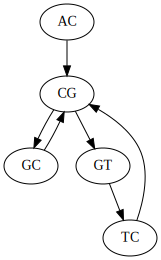

In [63]:
%dotstr visualize_de_bruijn("ACGCGTCG", 3)